## Tarea 4
## Covid-19 en Ecuador
#### Nombre: Carlos Andrade

##### Formulación del Problema . - Determina el objeto de la simulación. Se deben especificar claramente estos elementos:

Resultados que se esperan del simulador Se espera que aplicando los modelos matematicos de simulacion(modelo lineal y modelo logistico), estos nos ayuden a aproximarnos mas sobre estadisticas en los proximos meses sobre el covid.

Plan de experimentación Se establece como plan, realizar una recopilacion de la informacacion desde un csv, y luego en un cuaderno de python hacer los respectivos simulaciones.

Variables de interés Las variables de interes son el total que obtendremos en el calculo del modelo lineal y el modelo logistico, estas presentan un calculo que nos serviria para tener una idea proxima de eventos a ocurrir en la pandemia.

Tipo de perturbaciones a estudiar El desconocimiento de librerias para poder llevar a cabo el analisis y las variaciones de datos que no son exactos.

Tratamiento estadístico de los resultados Para ver de mejor manera estos valores se mandaran a graficar.

Complejidad del interfaz del simulador No contiene como tal una interfaz pero, se deden presentar conocimeintos basicos en python.

Definición del sistema . 
- El sistema que se simulará debe estar definido perfectamente. Se debe establecer donde estará la frontera de interacción entre el sistema a estudiar y el medioambiente.

In [1]:
# Implementar Covid-19 Regresión Lineal
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
#%matplotlib inline # Si quieres hacer estos gráficos dentro de un jupyter notebook
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

df = pd.read_csv('owid-covid-data.csv').fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

In [14]:
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Formulación del modelo . - En esta etapa se capturan los aspectos relevantes del sistema real. Estos aspectos dependen de la formulación del problema.

Se analizara datos como las muestras tomadas a cada paciente, estas muestras son por cada paciente que llega con sintomas o personas que se realizan dicha prueba, tambien se tiene los datos probables que existen de muertes confirmadas, pruebas rezagadas, muestras pcr, etc

Colección de datos . - La naturaleza y la cantidad de datos se determinan por la formulación del problema y del modelo. Pueden ser obtenidos de registros históricos, experimentos en laboratorio o mediciones realizadas en el sistema real.

In [15]:
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 729.6465842394807, b = -19722.37710437714
y = 729.6465842394807x -19722.37710437714


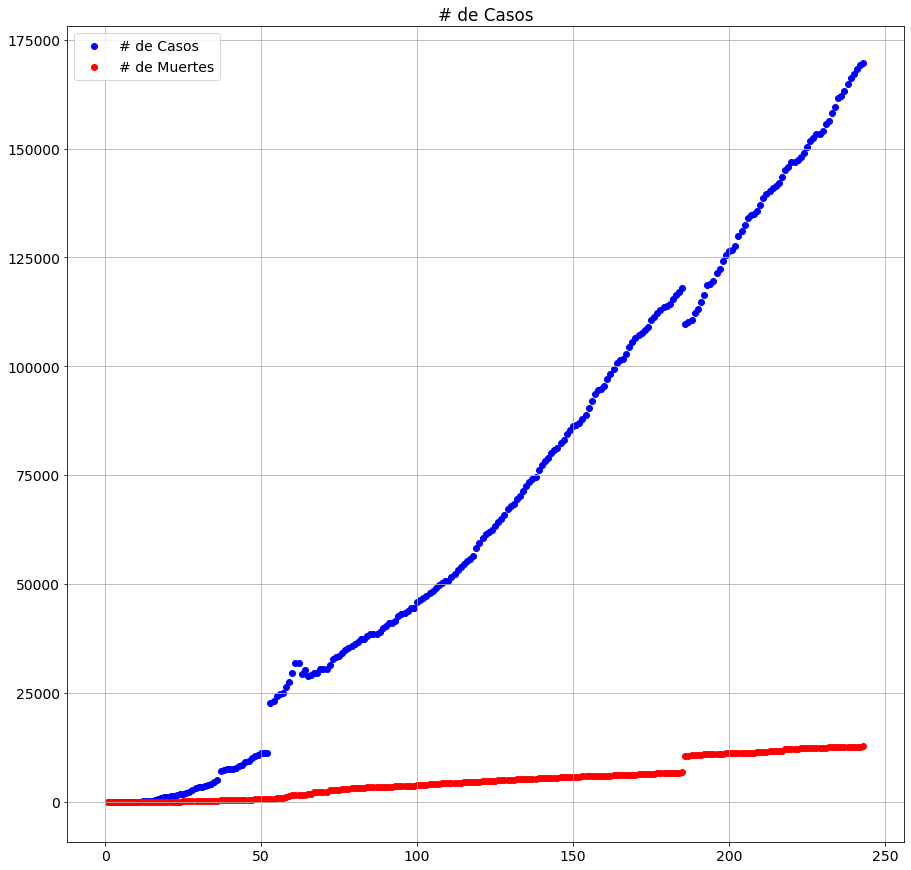

In [16]:
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='# de Casos', color='blue')
plt.scatter(x,y1,label='# de Muertes', color='red')
plt.grid(True)
plt.legend()
plt.title('# de Casos');

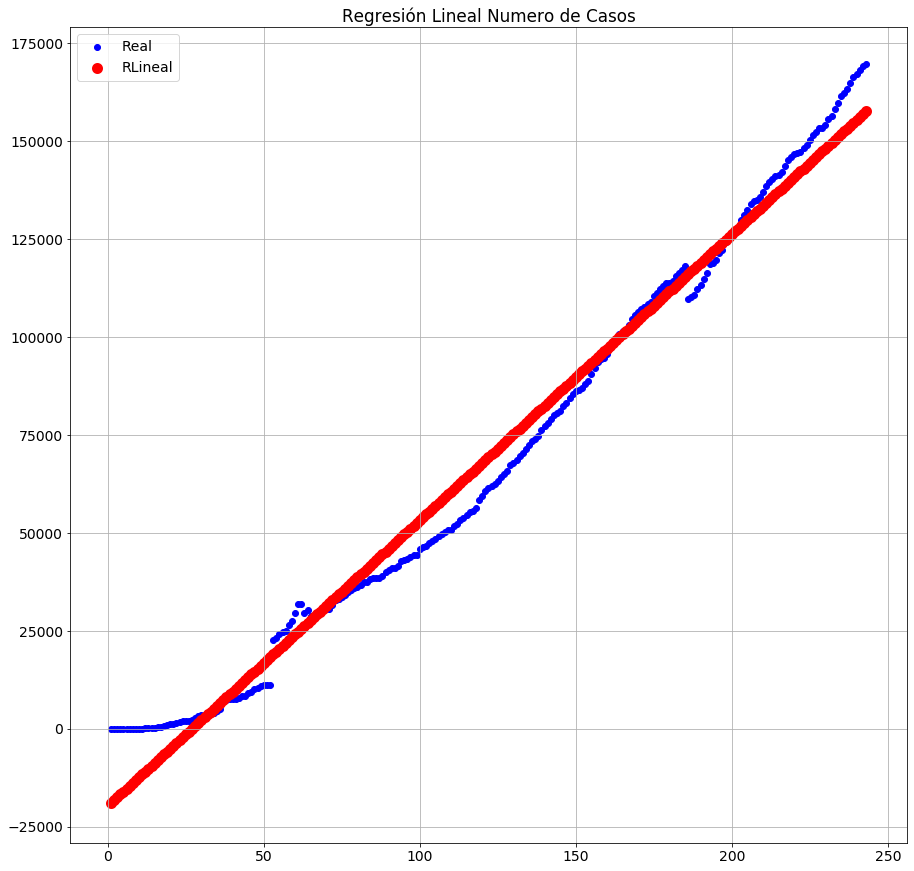

In [17]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1)+1,1)
plt.scatter(x1,fun(x1),color='red',linewidth=5.0,label='RLineal')
plt.legend()
plt.show()

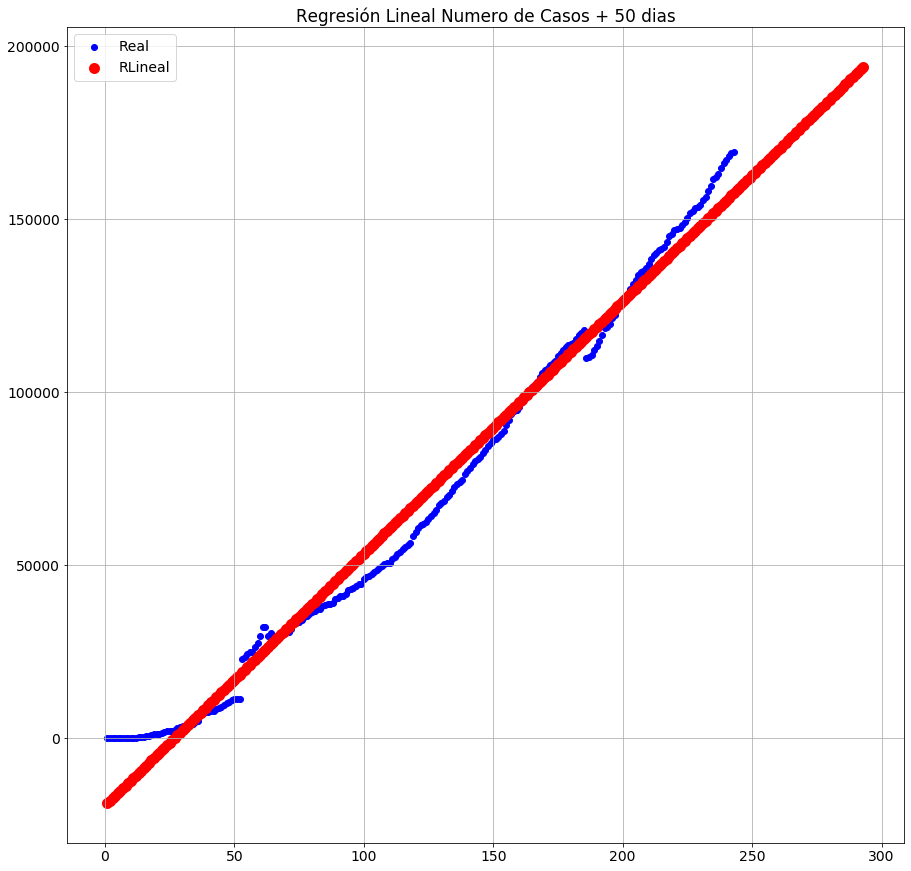

In [18]:
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos + 50 dias');
x1=np.arange(1,len(ndf1)+51,1)
plt.scatter(x1,fun(x1),color='red',linewidth=5.0,label='RLineal')
plt.legend()
plt.show()

In [19]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
exp_fit1 = curve_fit(modelo_logistico,x,y1) #Extraemos los valores de los paramatros

print(exp_fit)
print("")
print(exp_fit1)

(array([-132282.15628488,   44713.86100596]), array([[ 79233323.69668089, -16815968.22047471],
       [-16815968.22047471,   3730128.57348375]]))

(array([-10481.82124408,   3486.39542592]), array([[ 604709.26516529, -128339.5842676 ],
       [-128339.5842676 ,   28468.36684504]]))


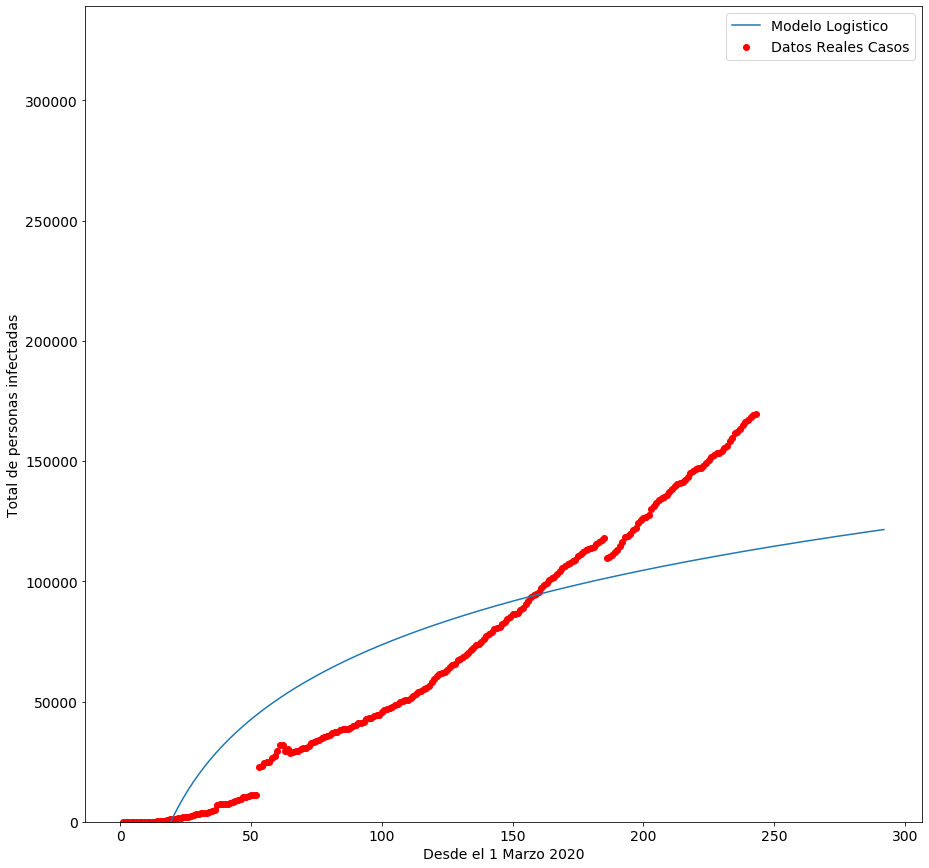

In [20]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales Casos",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) # Definir los limites de Y
plt.show()

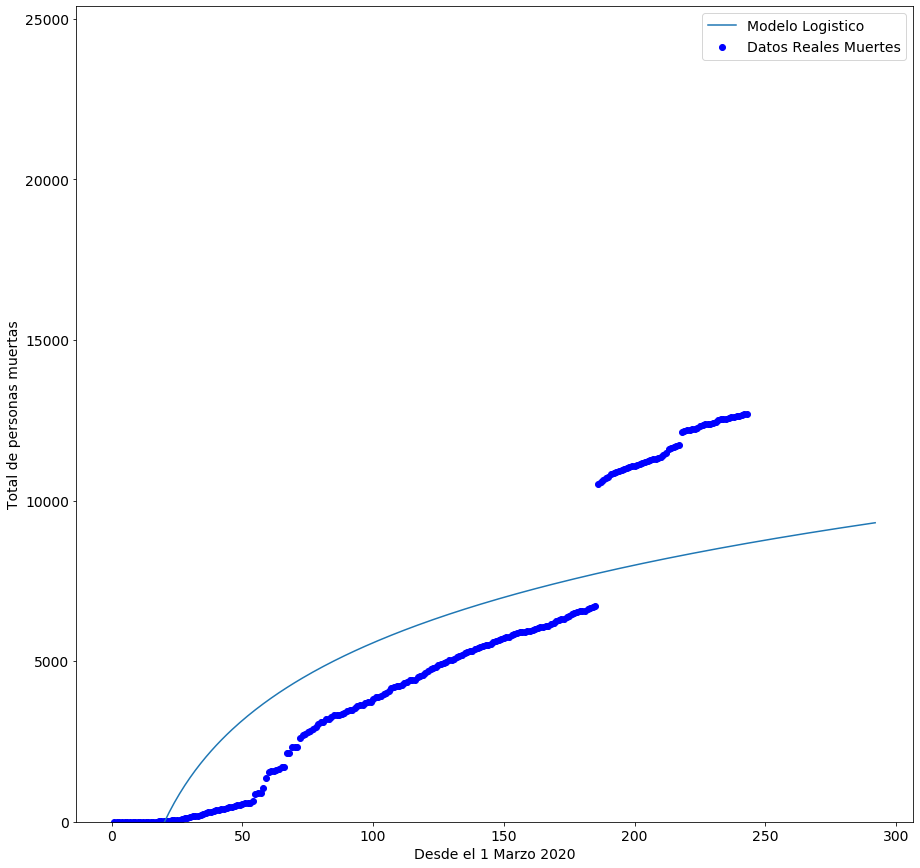

In [21]:
plt.scatter(x,y1,label="Datos Reales Muertes",color="blue")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas muertas")
plt.ylim(0,max(y1)*2) # Definir los limites de Y
plt.show()

##### Interpretacion 
me diante el uso de el modelo lineal se observa una gran diferencia ya que el modelo es bastante sdjetivo haciendo uso de el mismo se acerca mas al modelo mas acertado para ello hacmos uso de la funcion logaritmica.
##### Inplementacion
para la implemtacion se a seguido paso a paso mediante el analisis de los datos obtenidos aplicando los algoritmos de regrecion lineia y logaritmico.
##### Documentacion 
este documento contine detalladamente los pasos seguidos paa implementar los modelos 
##### Concluciones 
podemos concluir que mediante estos modelos podemos hacernos una idea de las posibles consecuencias y alcances que pueden llegar a tener sobre los mismo de esta manera podemos tomas las acciones correspondientes para evitar el peor de los escenarios posibles

